In [19]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# MNIST digits classification dataset
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along 
# with a test set of 10,000. More info at http://yann.lecun.com/exdb/mnist/
# and about the keras ref https://keras.io/api/datasets/mnist/
# path: path where to cache the dataset locally (relative to ~/.keras/datasets).
# Loads the MNIST dataset.
(X_train , y_train), (X_test  , y_test)=tf.keras.datasets.mnist.load_data(
    path='mnist.npz')
# It return Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

In [3]:
X_train=X_train/255
X_test=X_test/255
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [4]:
print(np.shape(X_test),np.shape(y_test))

(10000, 28, 28, 1) (10000, 10)


In [5]:
ann = tf.keras.models.Sequential()

In [18]:
ann.add(tf.keras.layers.Dense(units=28, activation ='relu',
input_shape=(28,28,1)))
ann.add(tf.keras.layers.Conv2D(14,(3,3)))
ann.add(tf.keras.layers.MaxPool2D((3,3),1))
ann.add(tf.keras.layers.Flatten())
ann.add(tf.keras.layers.Dense(units=14, activation ='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [7]:
optimizer = keras.optimizers.Adam(learning_rate= 0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=4)
ann.compile(optimizer=optimizer,loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [8]:
ann.fit(X_train,y_train,validation_split=0.2,batch_size=16,verbose=2,
    shuffle=True,epochs=100,callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 - 14s - loss: 0.1933 - acc: 0.9402 - val_loss: 0.0905 - val_acc: 0.9746
Epoch 2/100
48000/48000 - 15s - loss: 0.0825 - acc: 0.9753 - val_loss: 0.0867 - val_acc: 0.9757
Epoch 3/100
48000/48000 - 15s - loss: 0.0647 - acc: 0.9800 - val_loss: 0.0838 - val_acc: 0.9753
Epoch 4/100
48000/48000 - 14s - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0765 - val_acc: 0.9795
Epoch 5/100
48000/48000 - 14s - loss: 0.0430 - acc: 0.9861 - val_loss: 0.0997 - val_acc: 0.9733
Epoch 6/100
48000/48000 - 14s - loss: 0.0354 - acc: 0.9886 - val_loss: 0.0786 - val_acc: 0.9787
Epoch 7/100
48000/48000 - 14s - loss: 0.0296 - acc: 0.9903 - val_loss: 0.0819 - val_acc: 0.9788
Epoch 8/100
48000/48000 - 14s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0761 - val_acc: 0.9793


In [20]:
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100)

10000/10000 - 1s - loss: 0.0739 - acc: 0.9807

Test accuracy: 98.07000160217285


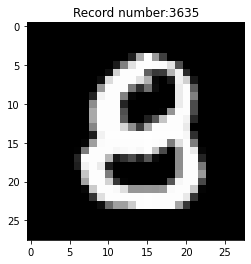

Correct Prediction 
Output is: 8


In [25]:
index=random.randint(0,len(X_test))
plt.title("Record number:"+str(index))
plt.imshow(X_test[index],cmap='gray')
plt.show()
randomTest=np.reshape(X_test[index],(1,28,28,1))
predOp=ann.predict(randomTest)
if np.argmax(predOp)==np.argmax(y_test[index]):
    print("Correct Prediction \nOutput is:",np.argmax(predOp))
else:
    print("Incorrect Prediction \nPreddicted Output is:",np.argmax(predOp),
    "\nActual Output is ",np.argmax(y_test[index]))

